In [7]:
#실습예제(이미지분류)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#데이터 로딩
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#케라스에서 처리할 수 있는 형태로 변환 (샘플개수, 가로, 세로, 차원)
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

#원핫인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

#모델 생성
model = models.Sequential()
#convolution layer, 필터개수 32, 필터 크기 3x3
#입력데이터 28x28x1 (흑백이미지1, 컬러이미지3)
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))

#맥스풀링 필터사이즈 2x2(필터사이즈롤 줄임)
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3),activation='relu'))

#fully connected layer로 변환(완전한연결층)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#출력층10개의 숫자로 분류
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#모델학습
hist=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2954 - accuracy: 0.9074
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0440 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0317 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0187 - accuracy: 0.9948


In [11]:
#검증용 데이터로 모델의 성능 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.9926


In [12]:
test_acc

0.9926000237464905

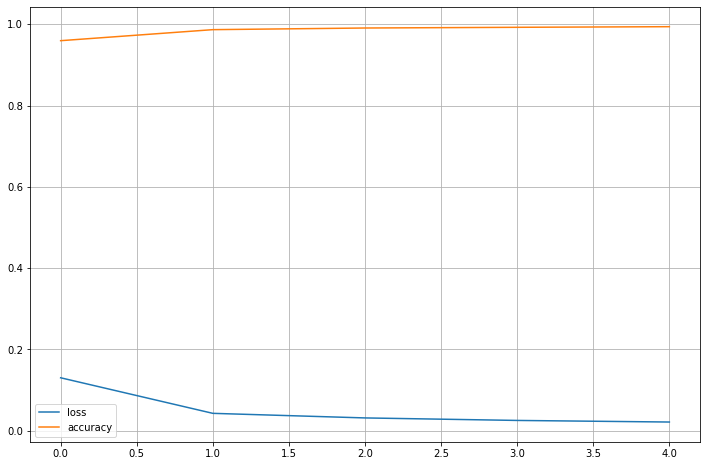

In [14]:
#모델의 학습 과정 표시
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [15]:
model.save('c:/data/mnist')

INFO:tensorflow:Assets written to: c:/data/mnist\assets
